<a href="https://colab.research.google.com/github/ruddysimon/ADS502_Team_Project_Data_Mining/blob/develop/breast_cancer_classification-with-outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification using Machine Learning <br>
Jacqueline Vo & Ruddy Simonpour <br>
ADS 502: Applied Data Mining <br>
15 August 2022 <br>

In [153]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# models
from sklearn.linear_model import LinearRegression

# confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

# Import data through github
df = pd.read_csv('https://raw.githubusercontent.com/ruddysimon/ADS502_Team_Project_Data_Mining/main/breast-cancer-wisconsin.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Preliminary Exploration & Data Cleaning

In [154]:
# Description of initial variable data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [155]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [156]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [157]:
#Check duplicate values
duplicate = df[df.duplicated()]
duplicate # The data does not have any duplicated values.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [158]:
col = df.columns
print(col)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [159]:
# Features are categorized by mean, se, and worst
features_mean= list(df.columns[1:11])
features_se= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print("Features Mean: ", features_mean)
print("---")
print("Features SE: ", features_se)
print("---")
print("Features Worst: ", features_worst)

Features Mean:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
---
Features SE:  ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
---
Features Worst:  ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


We were able to find that there are no duplicated or null values within the dataset.  During the initial data cleaning process, we only needed to remove the ID column. <br>

However, the variables are divided based on mean, worst, and standard error, which we might need to look into further to determine which variables should be prioritized during our analysis.

In [160]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Number of Benign:  357
Number of Malignant :  212


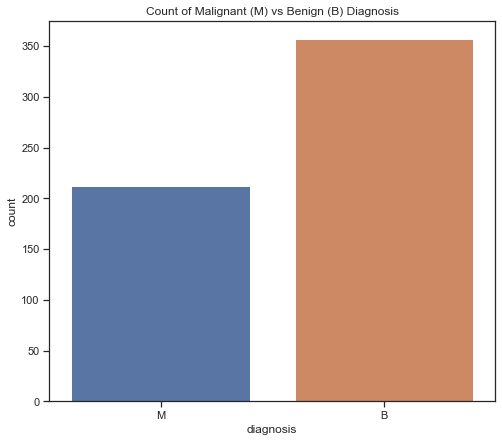

In [161]:
# Exploring relationships between features/variables (correlations)
# Bar graph of diagnosis (M/B)
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df).set(title='Count of Malignant (M) vs Benign (B) Diagnosis')

B, M = df['diagnosis'].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Our data is distributed so that a benign diagnosis is much more common than malignant. There is a minor class imbalance that may not require rebalancing initially.

In [162]:
# Understanding the distribution of the variables 
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Left skewnes and right skewnes are displayed in the skew result. Values that are closer to zero are considered as a negative (left) skewnes and values are higher than zero are conisdered as a positive (right) skewnes.


<AxesSubplot:>

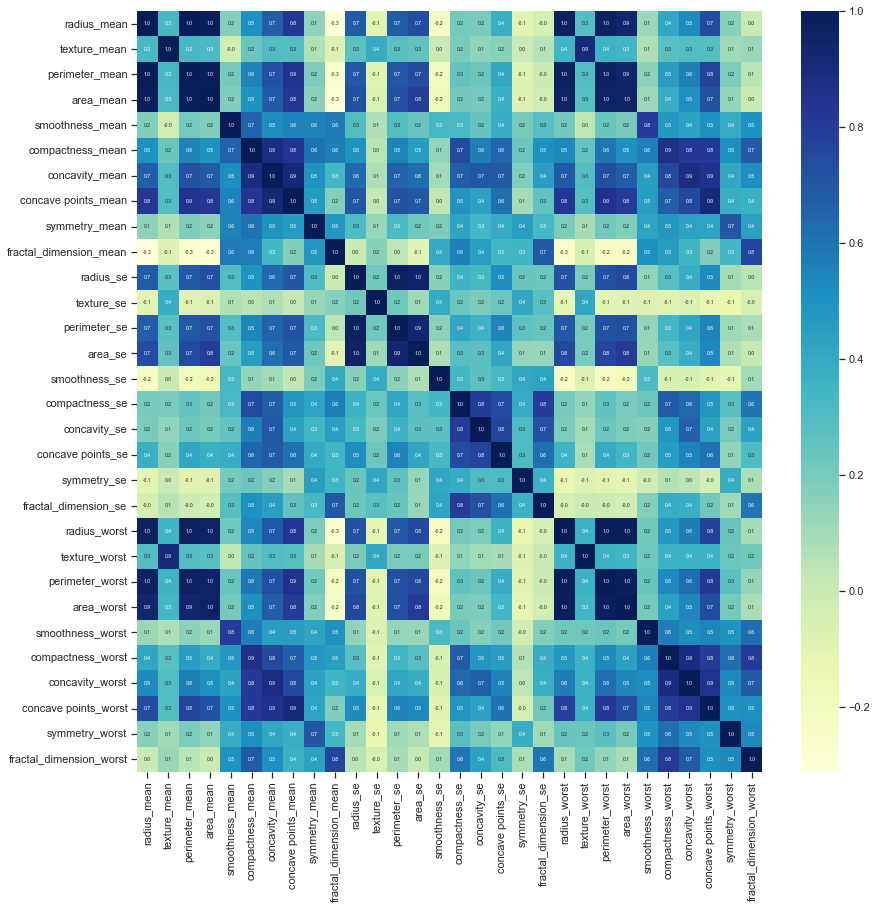

In [163]:
# Preliminary identification of correlation within features
corr = df.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, cbar = True, annot = True, 
            fmt = '.1f', annot_kws = {'size': 5},
            cmap= "YlGnBu")

The heatmap shows that features with high correlation. Since we assume the following are correlated, we would only need to select one of these variables to use as prediction variables.

* radius_mean, perimeter_mean and area_mean (select radius_mean)
* compactness_mean, concavity_mean and concave points_mean (select compactness_mean)
* radius_se, perimeter_se and area_se (select perimeter_se)
* radius_worst, perimeter_worst and area_worst (select area_worst)
* compactness_worst, concavity_worst and concave points_worst (select concavity_worst)
* compactness_se, concavity_se and concave points_se (select concave points_se)
* texture_mean and texture_worst (select texture_worst)
* area_worst and area_mean are correlated (area_mean)

In [164]:
# create a new binary column if the diagnosis is M the value would be 1 if not is 0
df['diagnosis_target'] = df['diagnosis'].replace(['M', 'B'], [1, 0])
df.drop("diagnosis", axis = 1, inplace = True)

### Outliers

In [165]:
#function for Loop through attributes to display histograms and outliers
def hist_box(df):
    for attribute in df.columns:
        sns.set(style="ticks")

        fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                        gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

        sns.boxplot(x= df[attribute], ax=ax_box)
        sns.histplot(x = df[attribute], ax=ax_hist, kde=True)


        ax_box.set(yticks=[])
        sns.despine(ax=ax_hist)
        sns.despine(ax=ax_box, left=True)

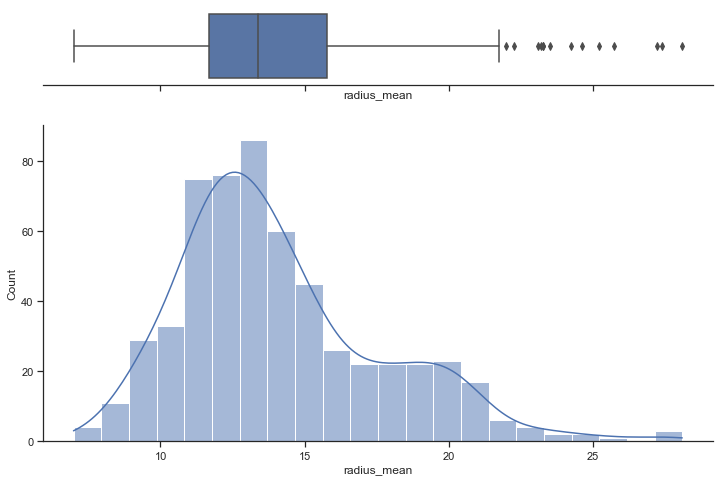

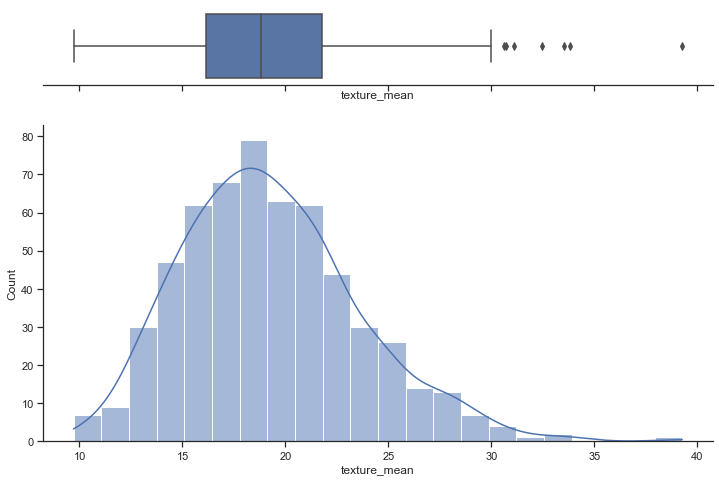

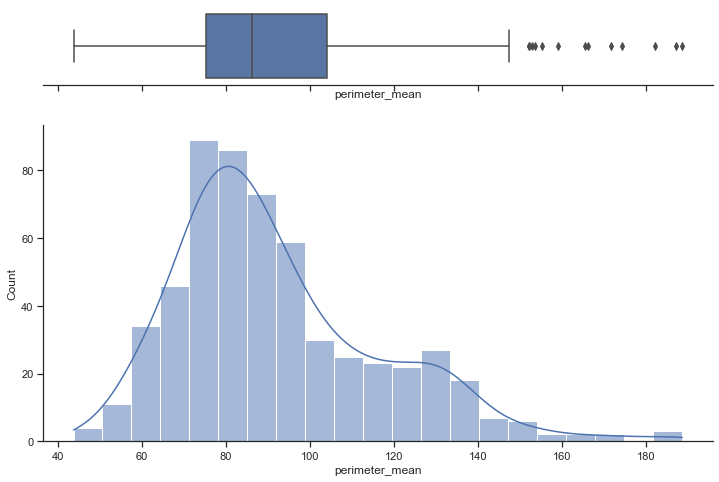

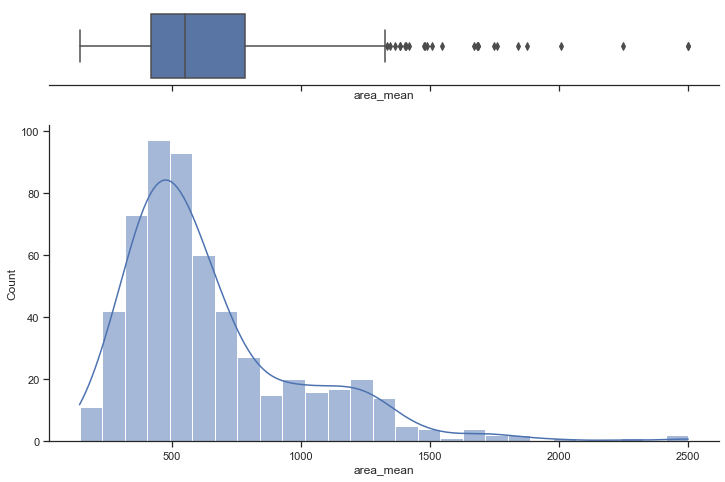

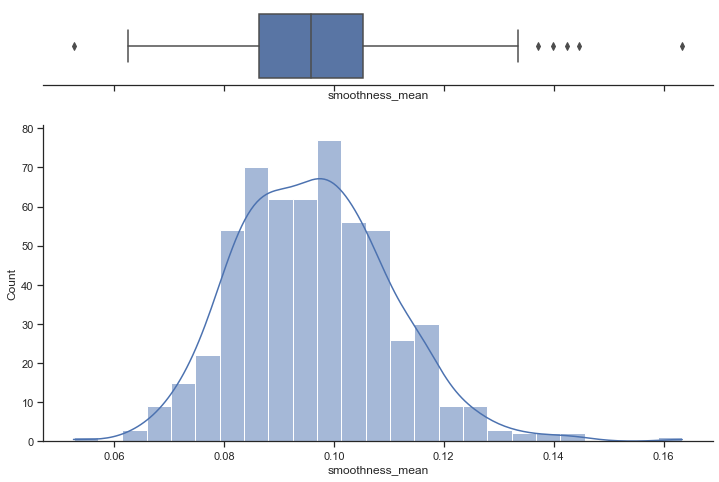

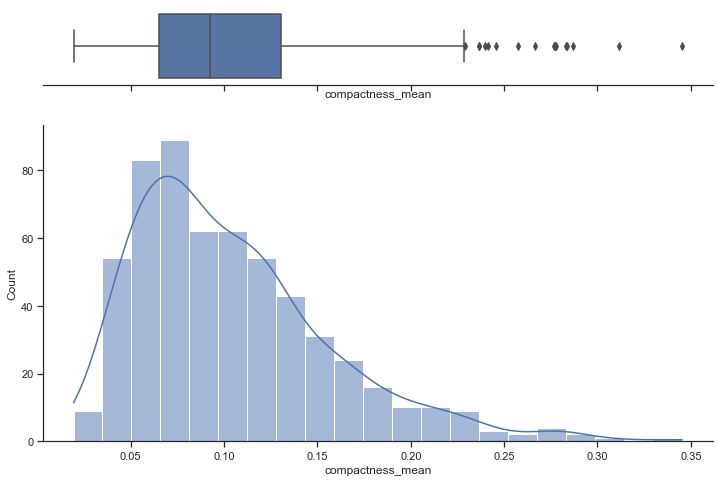

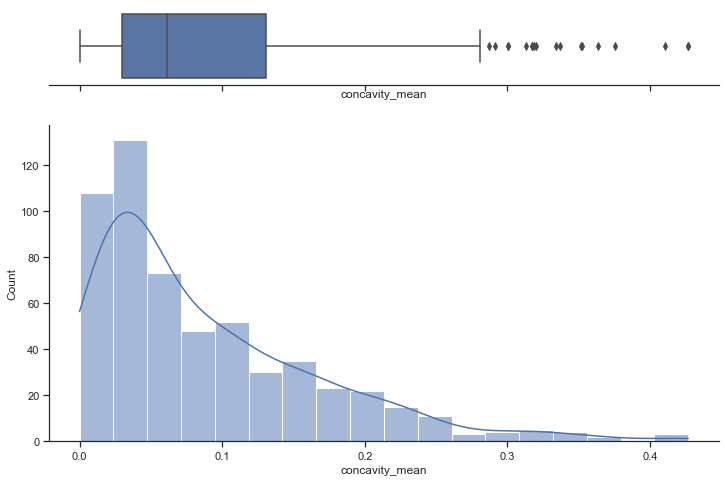

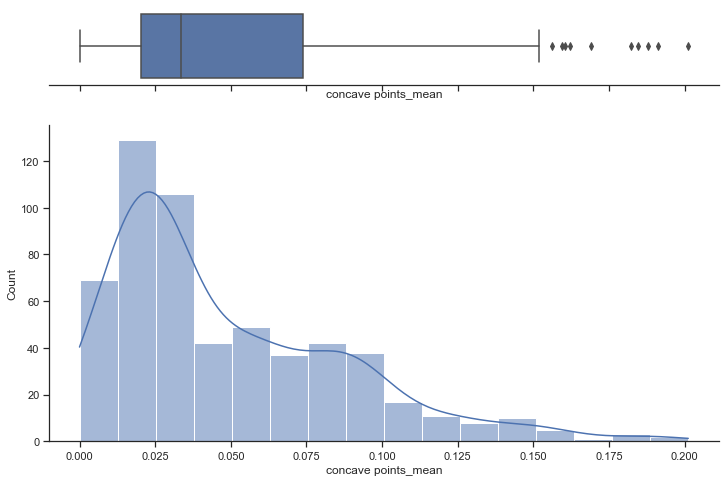

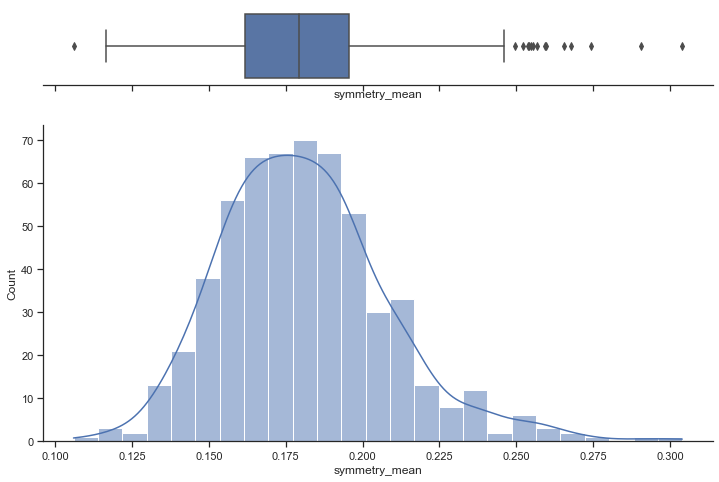

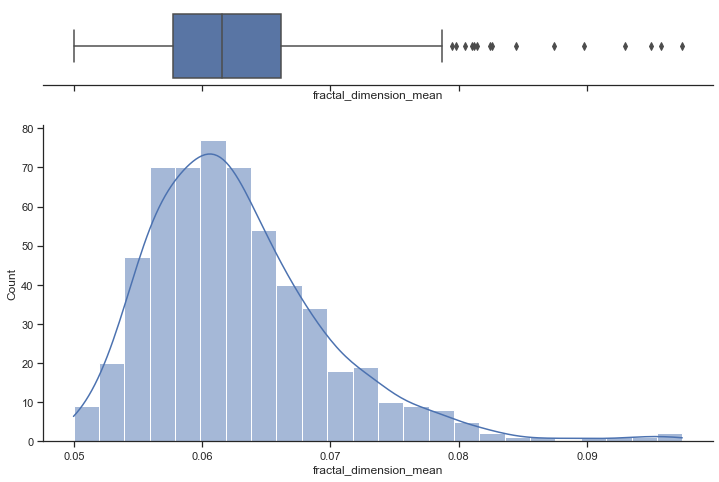

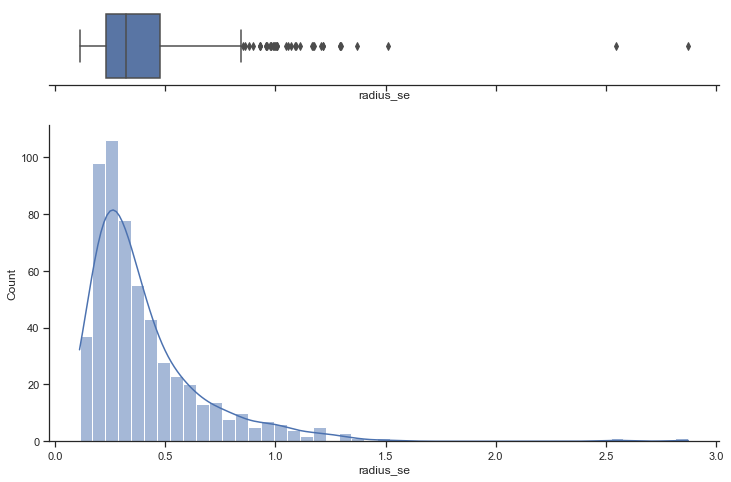

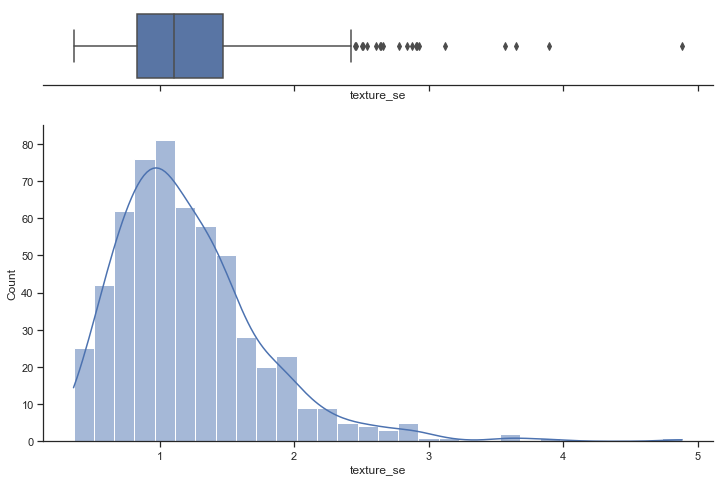

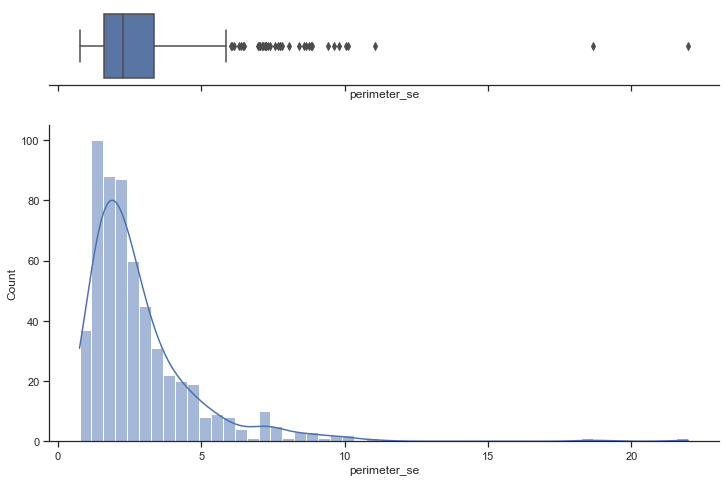

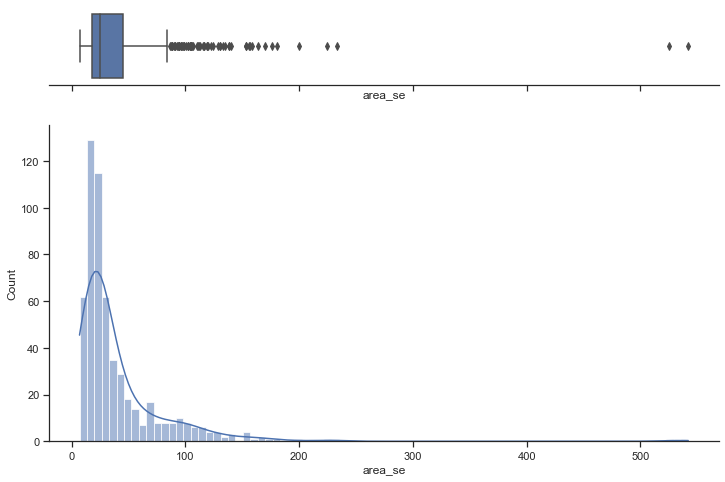

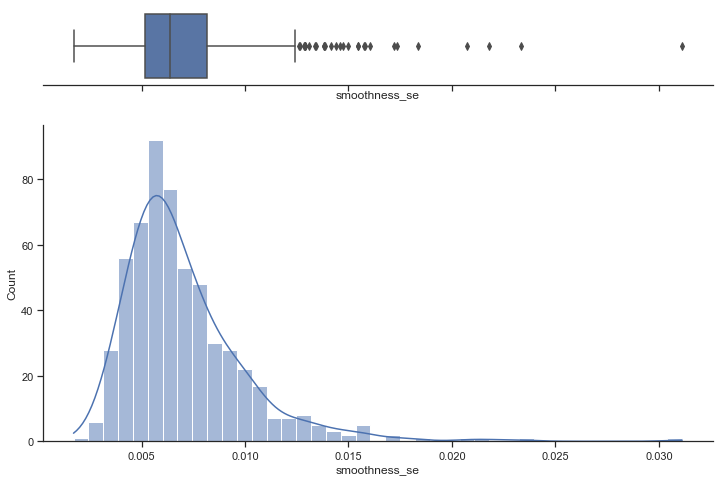

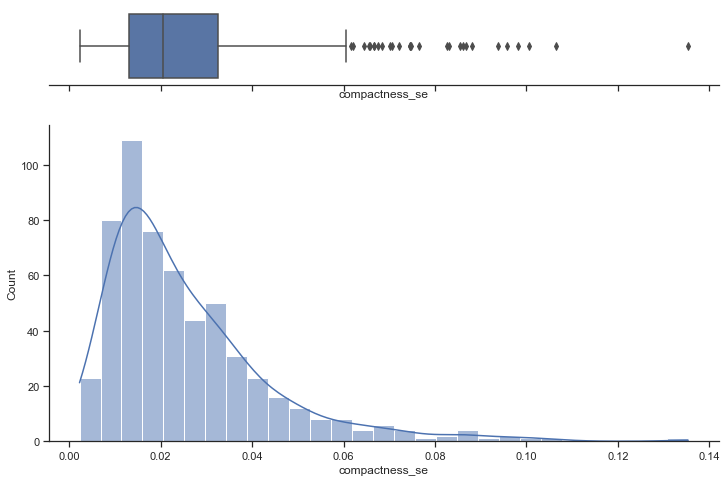

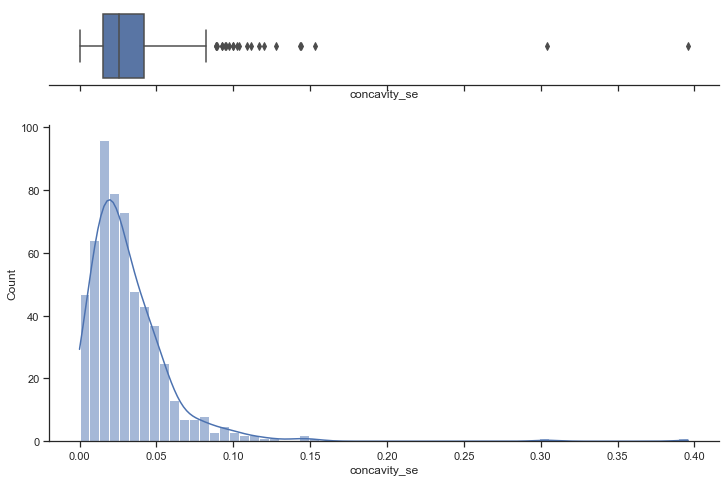

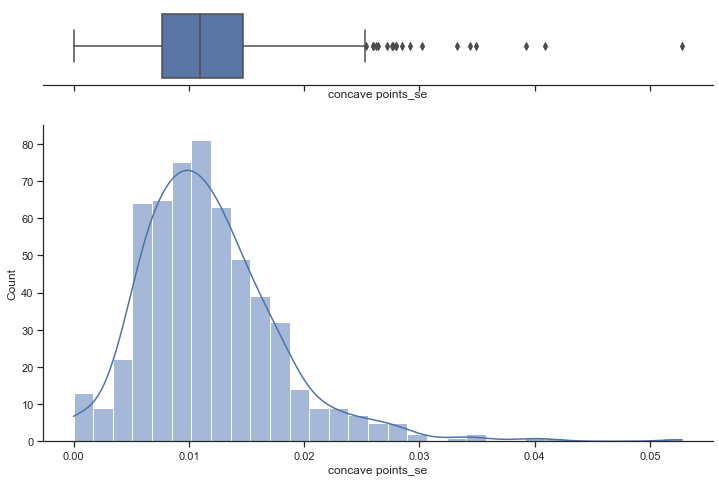

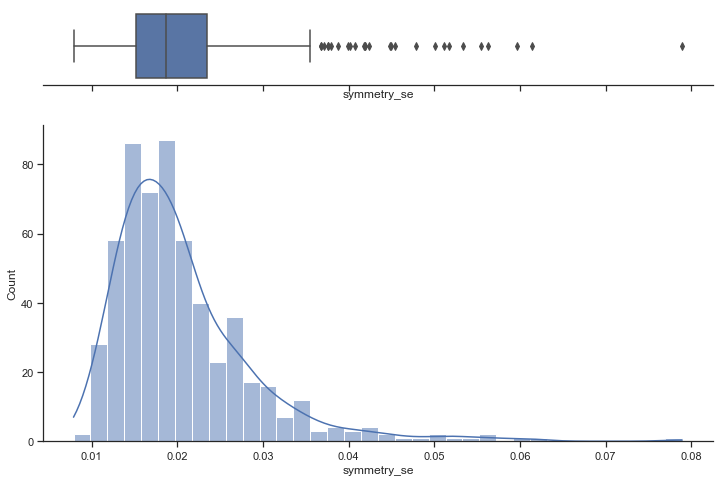

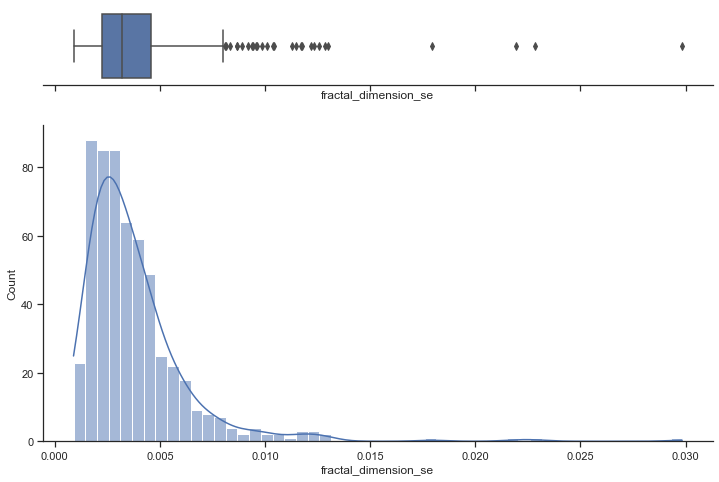

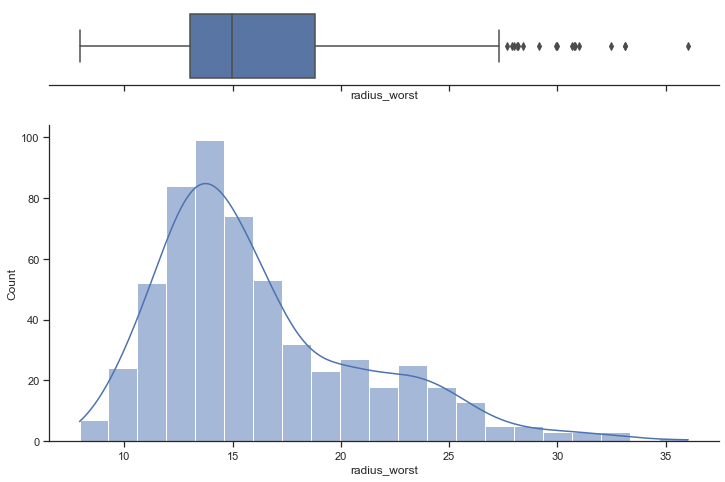

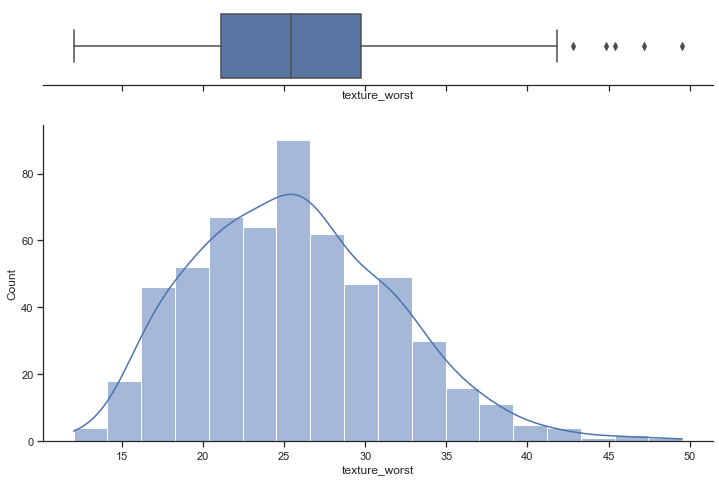

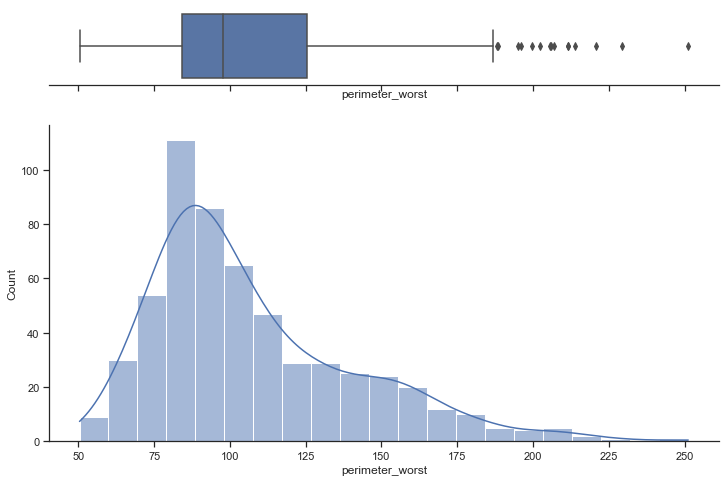

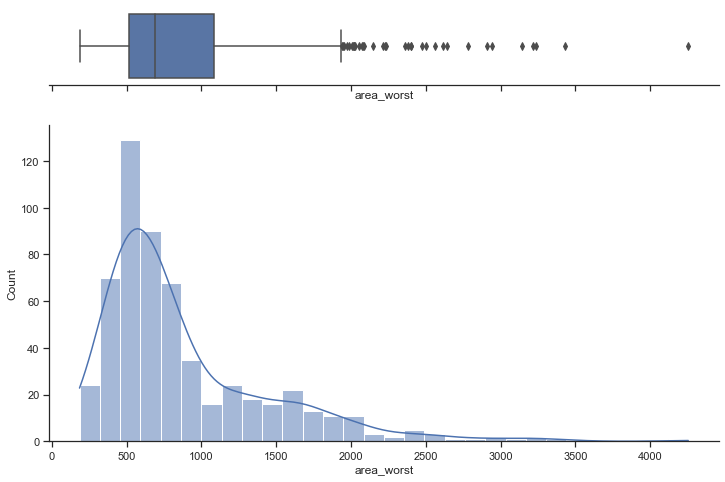

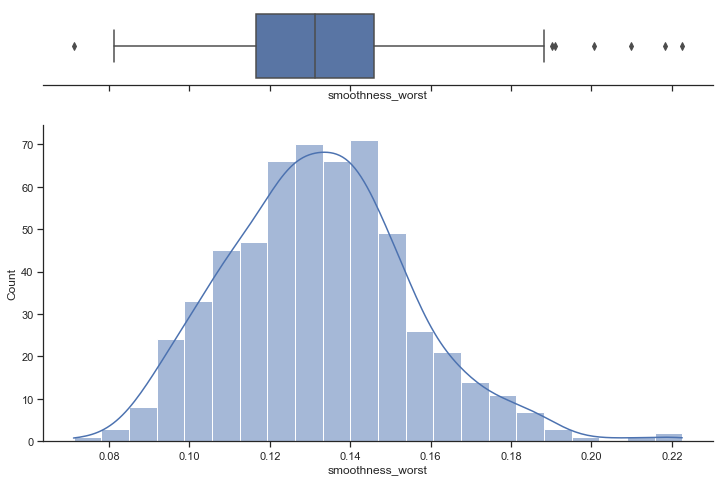

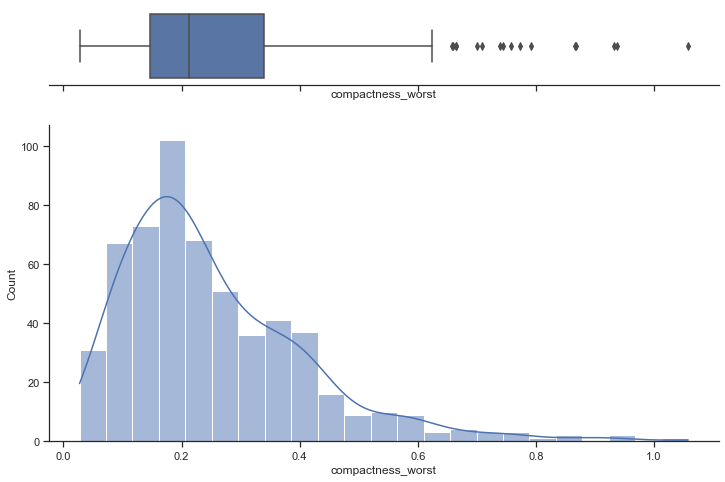

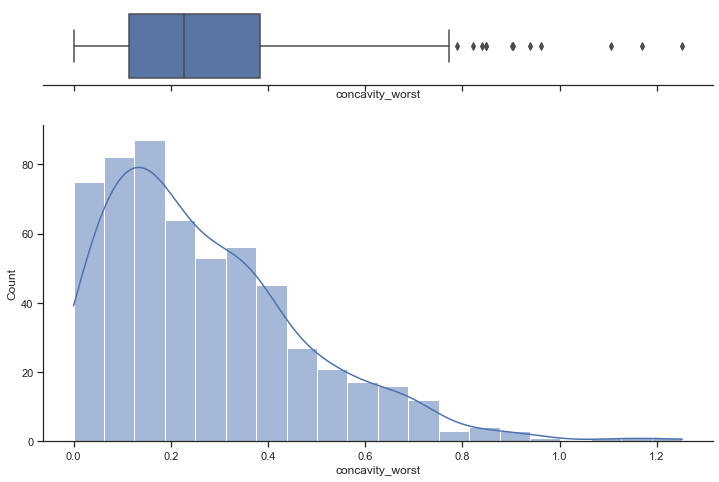

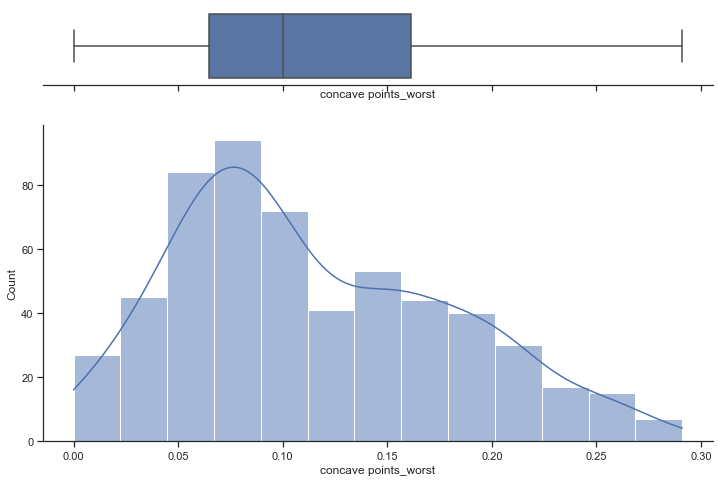

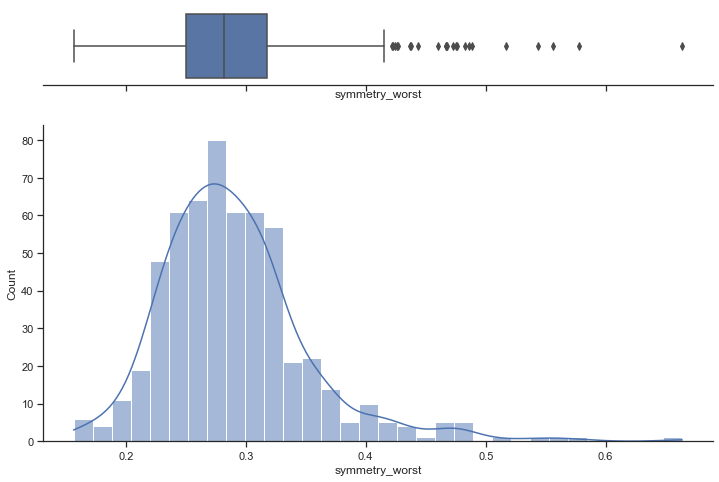

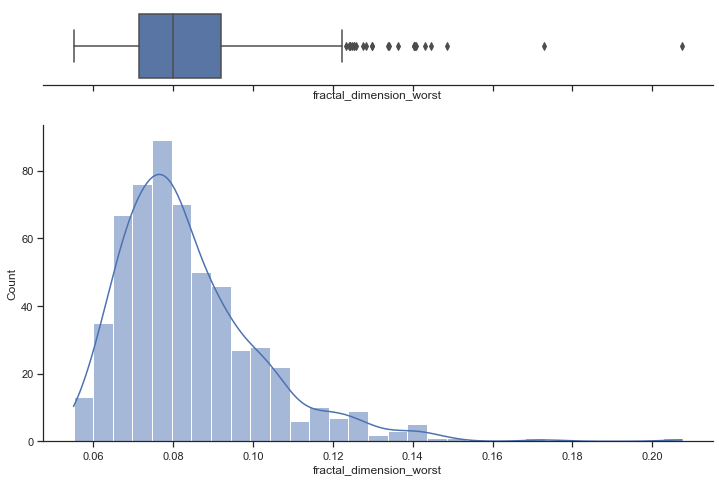

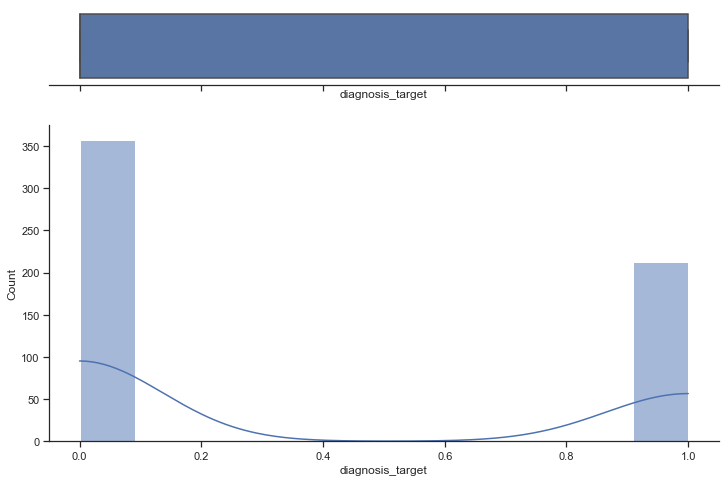

In [166]:
#show charts to display histograms and outliers
hist_box(df)

In [167]:
#Function to remove outliers
def remove_ouliers(df1,attribute):
    
    #Calculate IQR
    q1 = df[attribute].quantile(0.25)
    q3 = df[attribute].quantile(0.75)
    iqr = q3 - q1
    
    #remove outliers
    df1 = df1.loc[(df1[attribute] < 1.5 * iqr + q3) & (df1[attribute] > q1 - 1.5 * iqr)].\
    sort_values(by=attribute,ascending=False)
    
    #After outliers
    hist_box(df1[[attribute]])
    
    return df1  

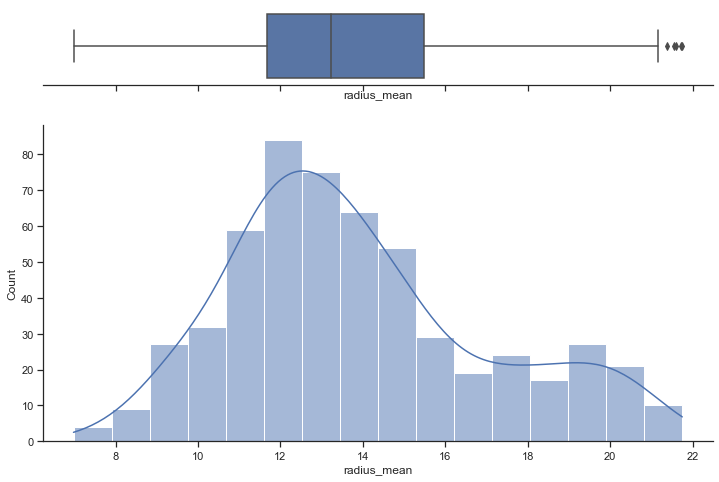

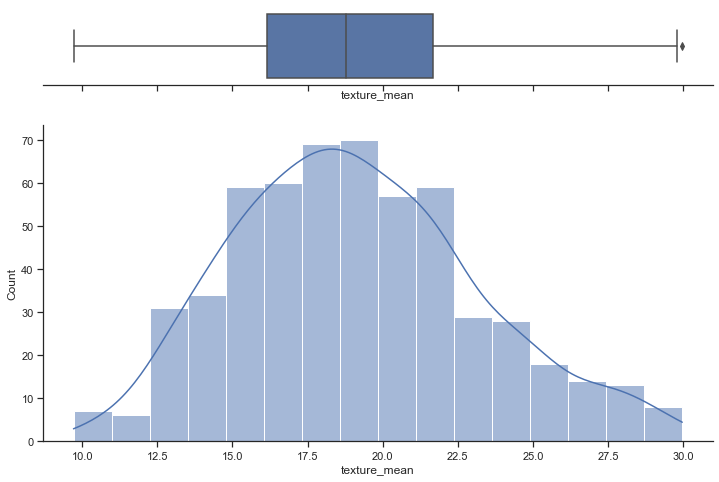

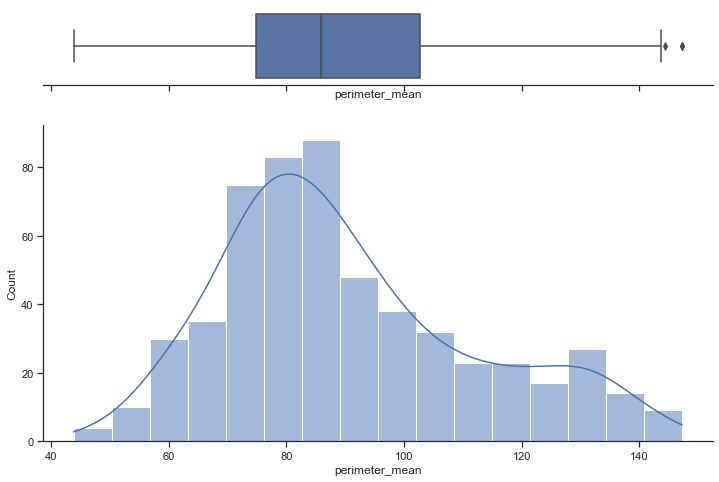

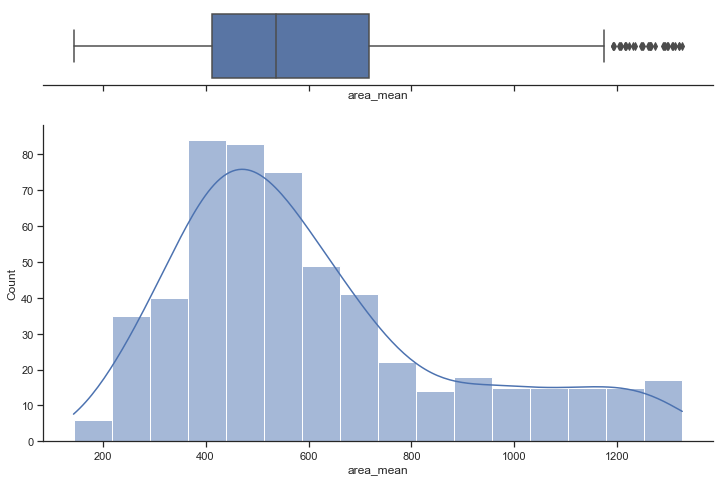

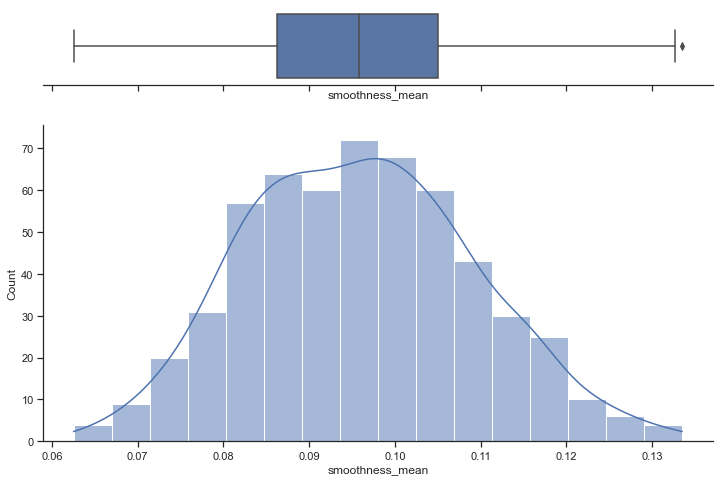

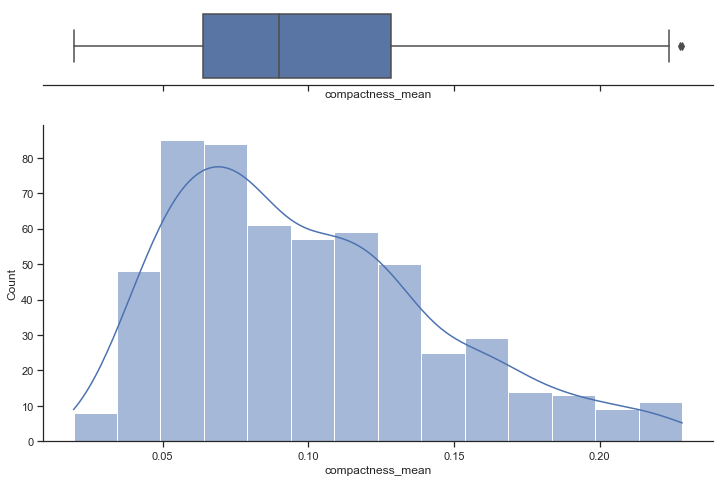

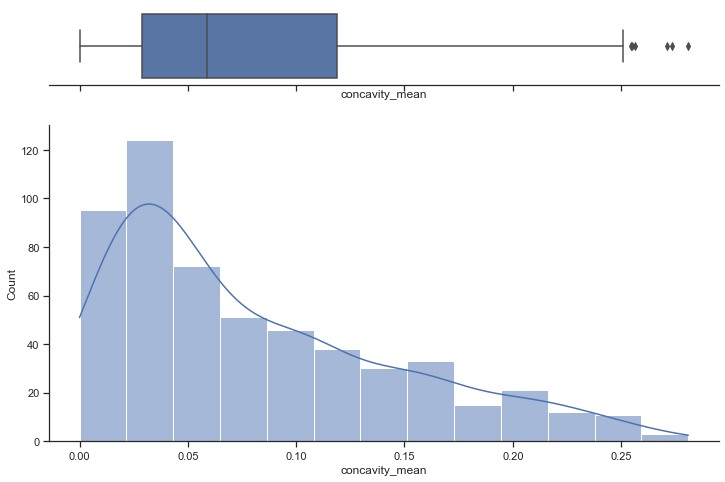

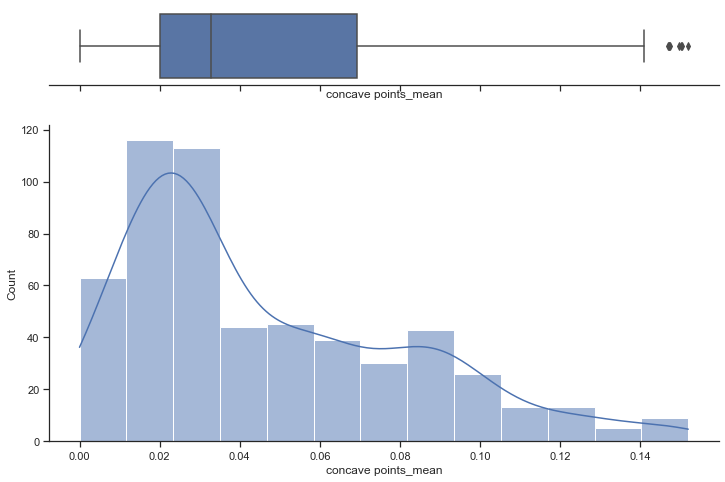

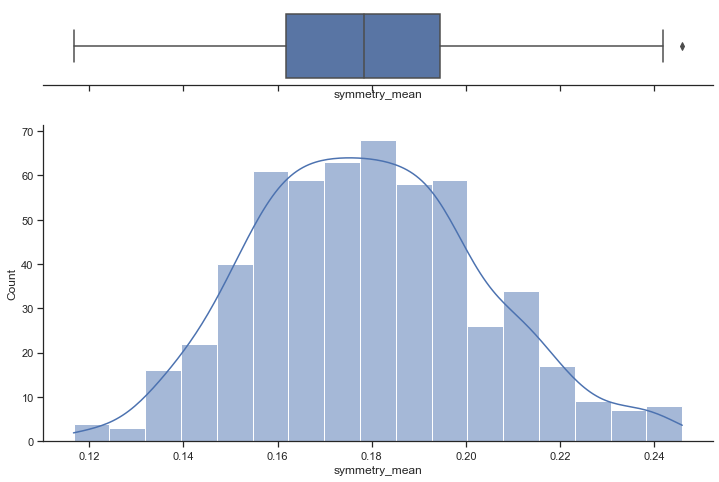

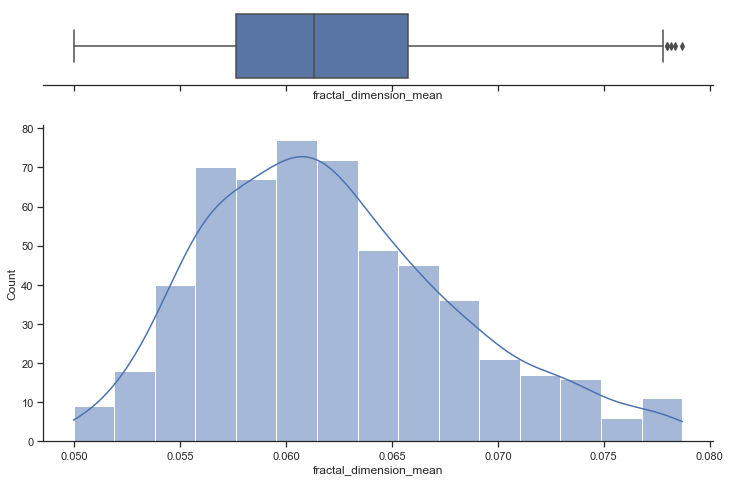

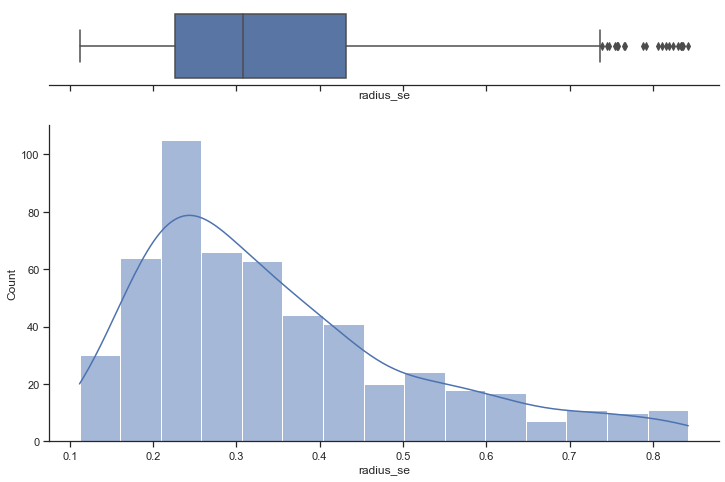

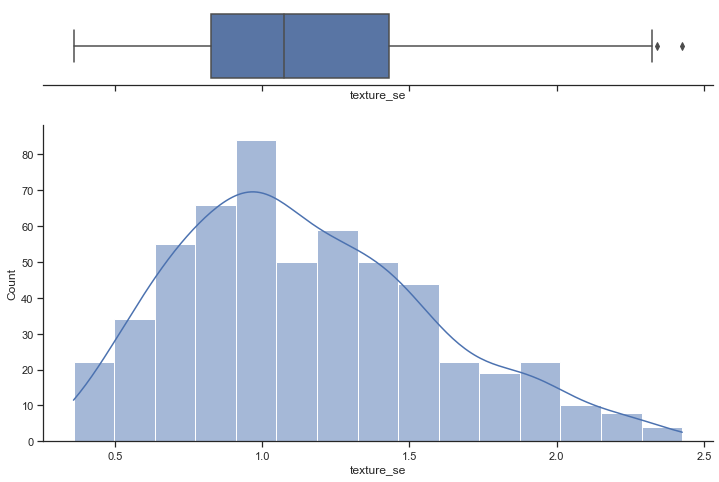

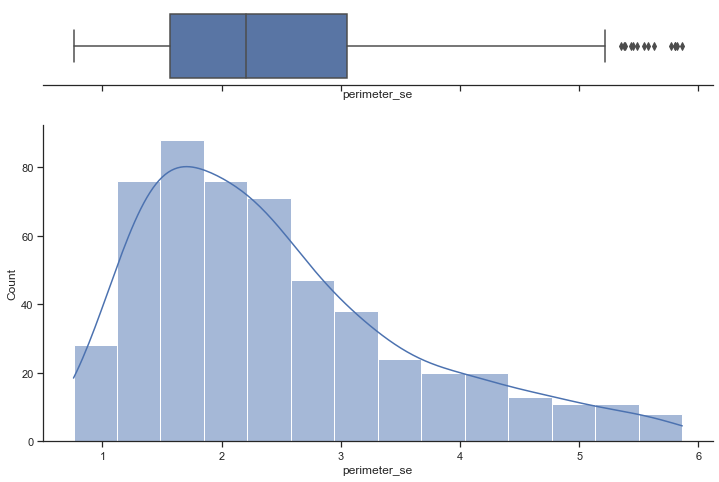

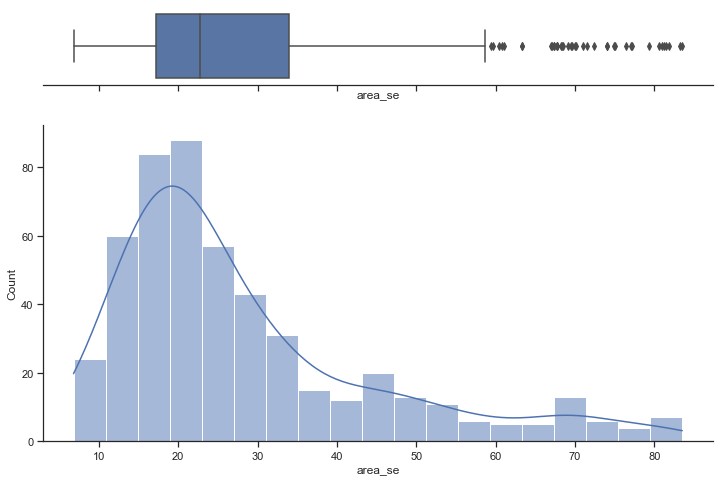

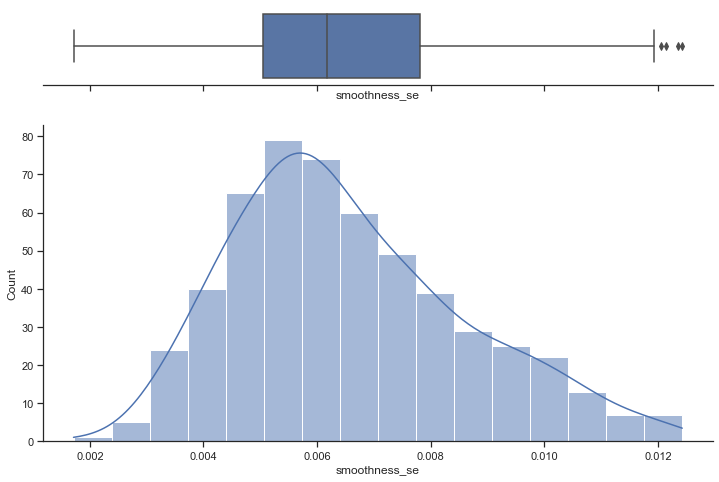

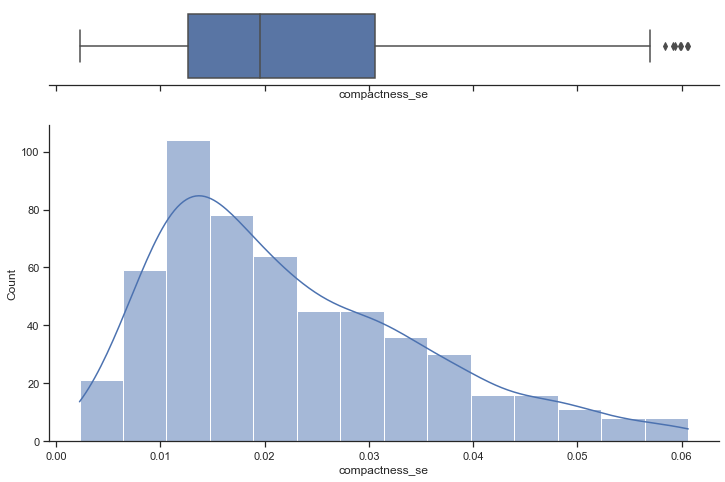

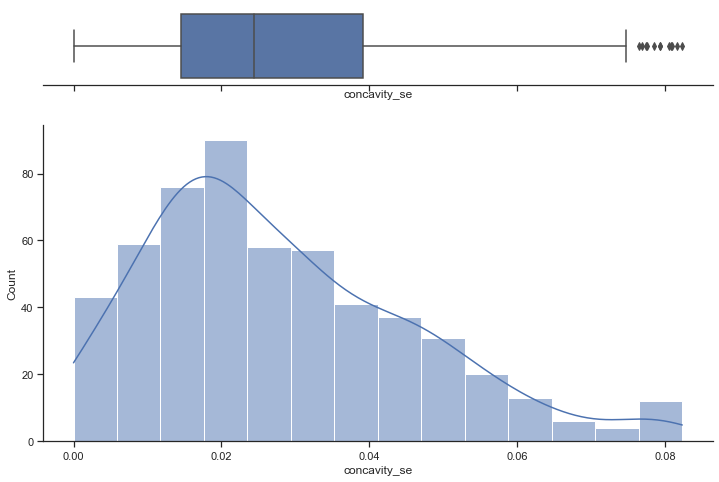

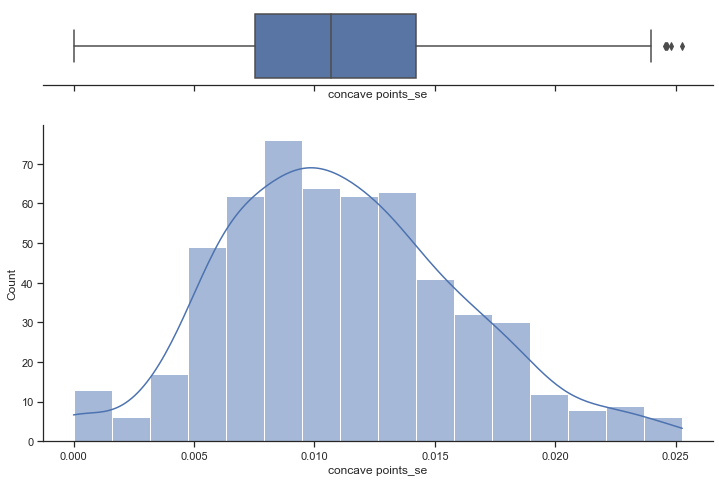

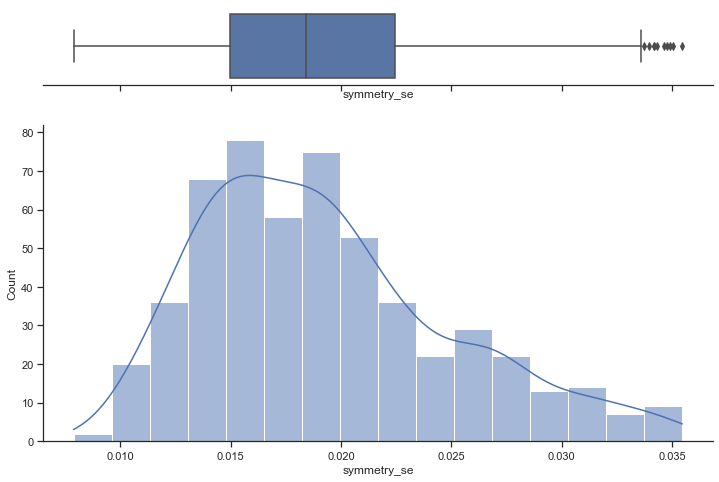

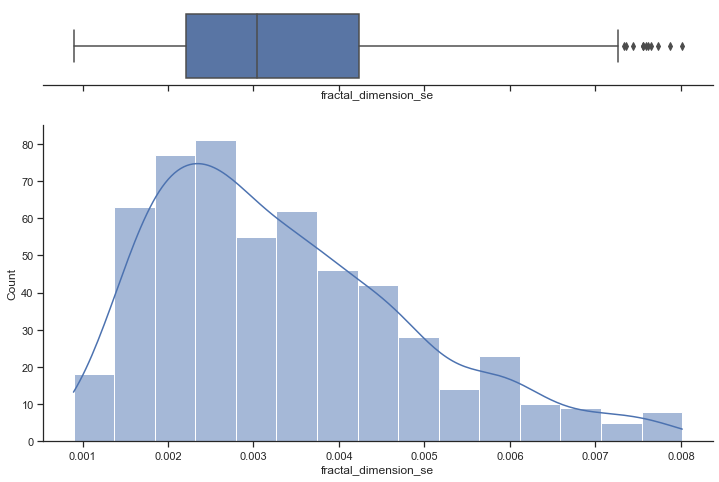

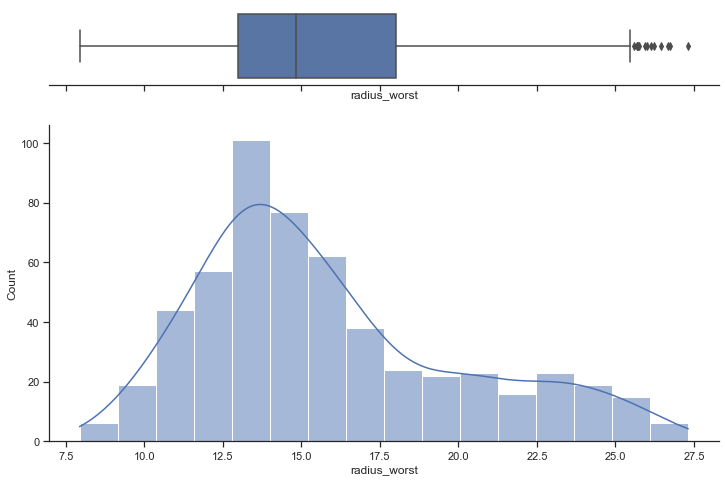

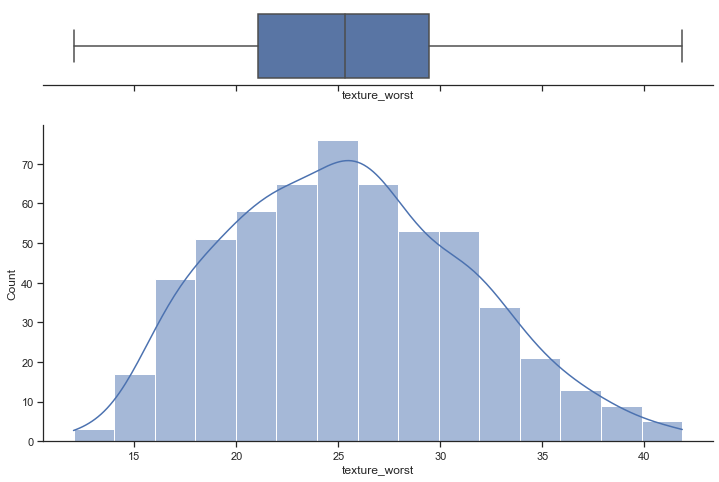

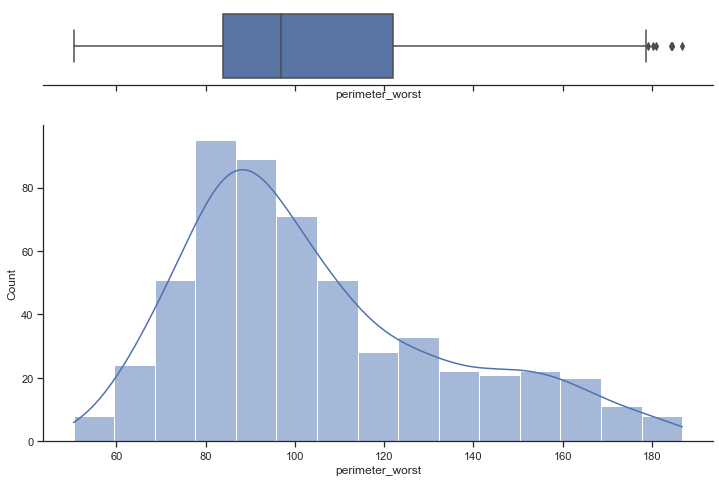

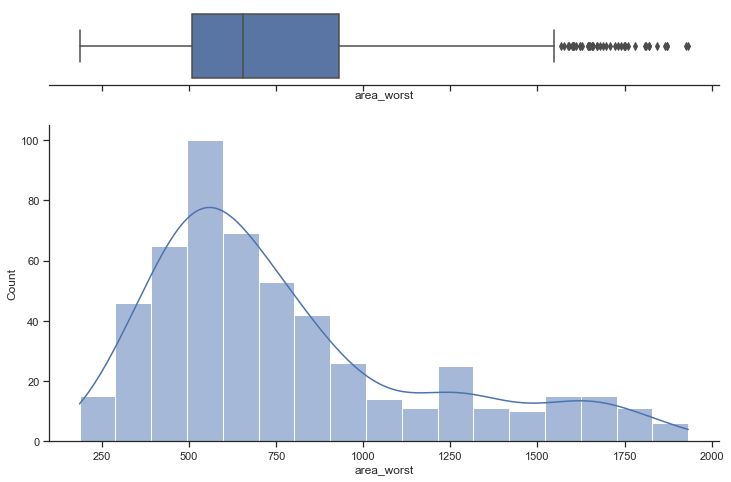

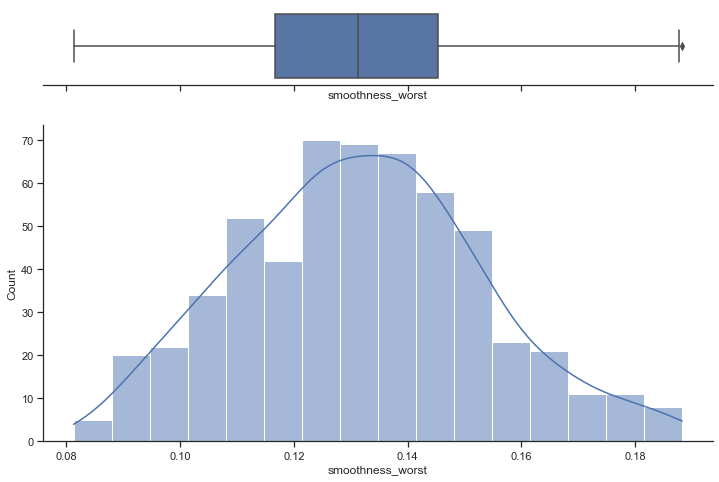

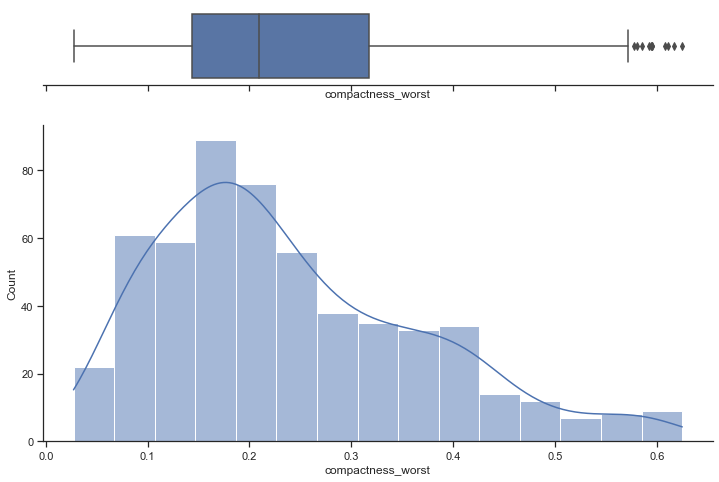

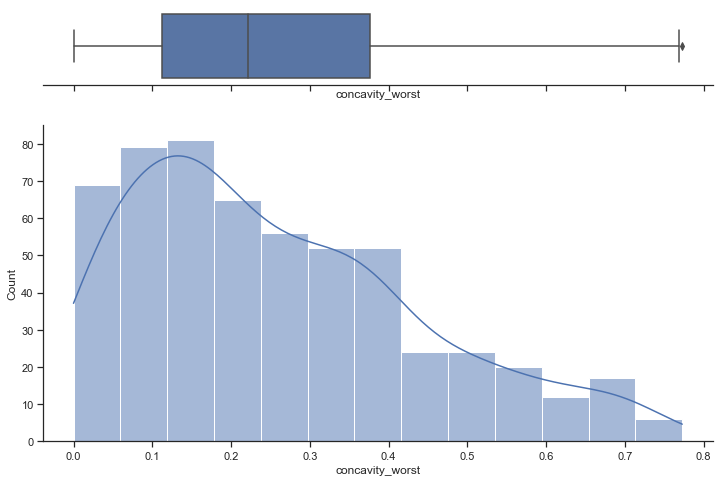

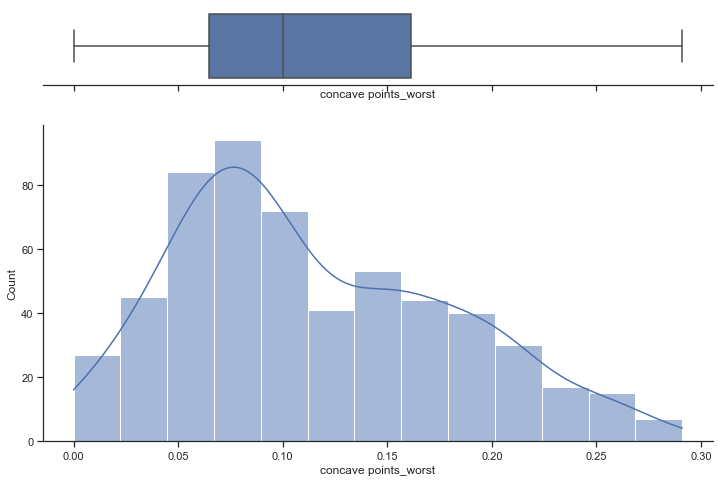

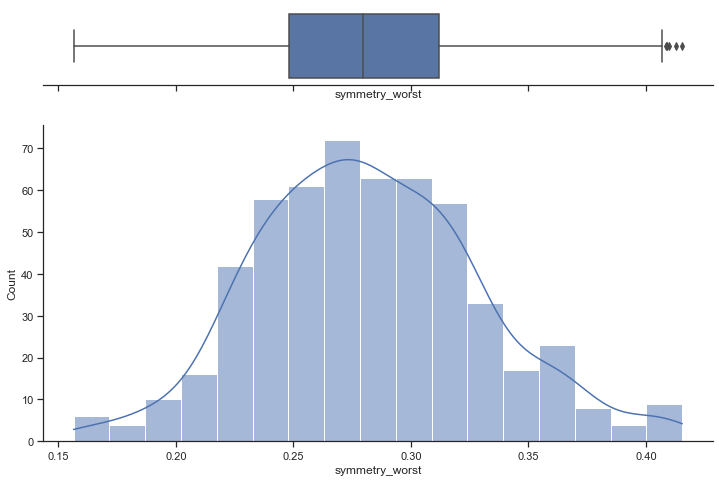

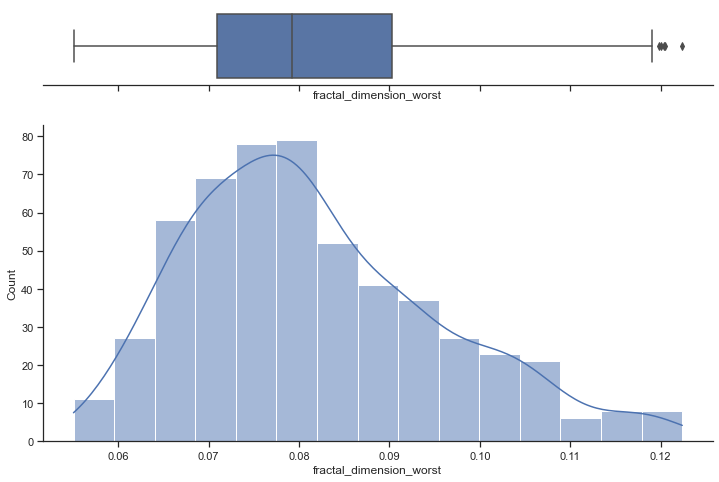

In [168]:
columns = ['radius_mean','texture_mean',"perimeter_mean","area_mean","smoothness_mean","compactness_mean",
          "concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se",
          "perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se",
          "symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst",
          "compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

for attribute in columns:
    remove_ouliers(df,attribute)

## Pre-processing

Data preprocessing refers to the procedures we must follow to alter or encode data so that a computer can quickly and readily decode it. The algorithm's ability to quickly analyze the properties of the data is essential for a model to be accurate and exact in its predictions.

In [62]:
# From our previous exploratory data analysis, the following variables will be used to as prediction variables for our models
predict_var = ['radius_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean',
               'texture_se','perimeter_se','smoothness_se','concave points_se','symmetry_se','fractal_dimension_se',
               'texture_worst','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']



In [169]:
# Divide the training and testing set into independent and dependent variables
import statsmodels.api as sm

X1 = pd.DataFrame(df[['radius_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean',
               'texture_se','perimeter_se','smoothness_se','concave points_se','symmetry_se','fractal_dimension_se',
               'texture_worst','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']])

y1 = pd.DataFrame(df[["diagnosis_target"]])


## Modeling 

In [170]:
X = df[['radius_mean','smoothness_mean','compactness_mean','symmetry_mean','fractal_dimension_mean',
               'texture_se','perimeter_se','smoothness_se','concave points_se','symmetry_se','fractal_dimension_se',
               'texture_worst','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']]

y = df.diagnosis_target

We will split the dataset into a training and testing set, in which 75% will be used for training and the remaining will be a testing set.

In [171]:
# Normalize the data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscale = scaler.fit_transform(X)

In [172]:
# Split the dataset into training and testing sets

#We use 75% of data for training and 25% for testing. 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscale, y , test_size=0.25, random_state=0)


### Linear model

### Logistic Regression

In [173]:
logreg = sm.Logit(y1, X1).fit()
logreg.summary2()

Optimization terminated successfully.
         Current function value: 0.088333
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                   Logit                Pseudo R-squared:     0.866      
Dependent Variable:      diagnosis_target     AIC:                  132.5230   
Date:                    2022-08-14 19:43     BIC:                  202.0251   
No. Observations:        569                  Log-Likelihood:       -50.261    
Df Model:                15                   LL-Null:              -375.72    
Df Residuals:            553                  LLR p-value:          5.2843e-129
Converged:               1.0000               Scale:                1.0000     
No. Iterations:          13.0000                                               
-------------------------------------------------------------------------------
                          Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------------
radius_mean                 0.3341   0.1428  2.3401 0.0193     0.0543    0.6139
smoothness_mean           104.0132  58.4277  1.7802 0.0750   -10.5029  218.5294
compactness_mean           67.3061  19.2180  3.5022 0.0005    29.6396  104.9726
symmetry_mean             -40.6707  21.8672 -1.8599 0.0629   -83.5297    2.1883
fractal_dimension_mean   -746.1858 127.6493 -5.8456 0.0000  -996.3738 -495.9979
texture_se                 -0.9325   1.0478 -0.8899 0.3735    -2.9861    1.1212
perimeter_se                1.9923   0.4662  4.2738 0.0000     1.0786    2.9060
smoothness_se             331.1536 195.8487  1.6909 0.0909   -52.7028  715.0100
concave points_se          -2.7439 124.6089 -0.0220 0.9824  -246.9727  241.4850
symmetry_se                36.5866  77.7047  0.4708 0.6378  -115.7118  188.8851
fractal_dimension_se    -1129.5536 431.5283 -2.6176 0.0089 -1975.3336 -283.7736
texture_worst               0.3043   0.0858  3.5463 0.0004     0.1361    0.4725
smoothness_worst            7.4379  38.8095  0.1917 0.8480   -68.6274   83.5032
concavity_worst             6.9329   3.1623  2.1924 0.0284     0.7350   13.1308
symmetry_worst             18.4741  12.2010  1.5141 0.1300    -5.4394   42.3877
fractal_dimension_worst   138.8185  64.0159  2.1685 0.0301    13.3496  264.2873
===============================================================================

"""

In [174]:
# import the model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train,y_train)

# make prediction
y_pred=log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [175]:
# The predict method is used to predict the actual class while predict_proba method can be used to 
# infer the class probabilities
probs_lr = log_reg.predict_proba(X_test)[:,1]

#### Evaluation model using confusion matrix

In [176]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [177]:
conf_mat_logreg = pd.crosstab(y_test, y_pred, rownames=['Actual'], \
                       colnames=['Predicted'], margins = True) 
conf_mat_logreg

Predicted,0,1,All
Actual,,,
0,86,4,90
1,4,49,53
All,90,53,143


Text(0.5, 257.44, 'Predicted label')

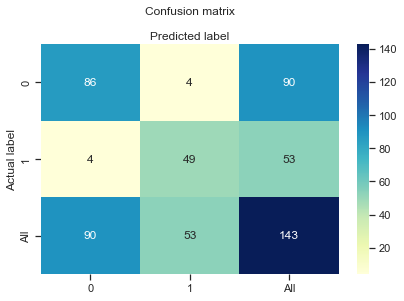

In [178]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_logreg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [179]:
lg_acc_train = accuracy_score(y_train, log_reg.predict(X_train))
print(f'The accuracy of the training dataset is: {lg_acc_train}')

lg_acc_test = accuracy_score(y_test, y_pred)
print(f'The accuracy of the test dataset is: {lg_acc_test}')

The accuracy of the training dataset is: 0.9859154929577465
The accuracy of the test dataset is: 0.9440559440559441


In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### Detecting important features/variables

Feature: 0, Score: 2.598
Feature: 1, Score: 0.591
Feature: 2, Score: 0.100
Feature: 3, Score: 0.337
Feature: 4, Score: -0.786
Feature: 5, Score: -0.354
Feature: 6, Score: 2.289
Feature: 7, Score: -0.228
Feature: 8, Score: 0.444
Feature: 9, Score: -0.086
Feature: 10, Score: -1.187
Feature: 11, Score: 1.485
Feature: 12, Score: 0.635
Feature: 13, Score: 1.061
Feature: 14, Score: 0.485
Feature: 15, Score: 0.737


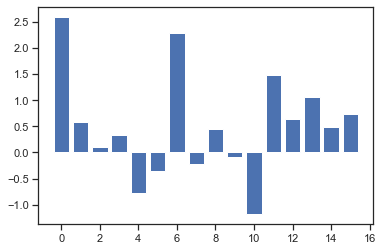

In [181]:
importance = log_reg.coef_[0]

for i,x in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,x))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Non-parametric models

### Decision Tree using C5.0

In [182]:
# import the model
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0,
                                 max_leaf_nodes = 5)

# fit the model
dec_tree.fit(X_train, y_train)

# make predictions
y_pred_dt = dec_tree.predict(X_test)
y_pred_dt

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [183]:
# The predict method is used to predict the actual class while predict_proba method can be used to 
# infer the class probabilities
probs_dt_c5 = dec_tree.predict_proba(X_test)[:,1]

#### Evaluation model using confusion matrix

In [184]:
cm = metrics.confusion_matrix(y_test, y_pred_dt)

In [185]:
conf_mat_dtc5 = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], \
                       colnames=['Predicted'], margins = True) 
conf_mat_dtc5

Predicted,0,1,All
Actual,,,
0,87,3,90
1,5,48,53
All,92,51,143


Text(0.5, 257.44, 'Predicted label')

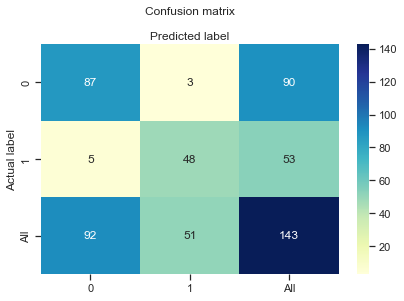

In [186]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_dtc5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [187]:
dtc5_acc_train = accuracy_score(y_train, dec_tree.predict(X_train))
print(f'The accuracy of the training dataset is: {dtc5_acc_train}')

dtc5_acc_test = accuracy_score(y_test, y_pred_dt)
print(f'The accuracy of the test dataset is: {dtc5_acc_test}')

The accuracy of the training dataset is: 0.931924882629108
The accuracy of the test dataset is: 0.9440559440559441


In [188]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        90
           1       0.94      0.91      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



#### Detecting important features/variables

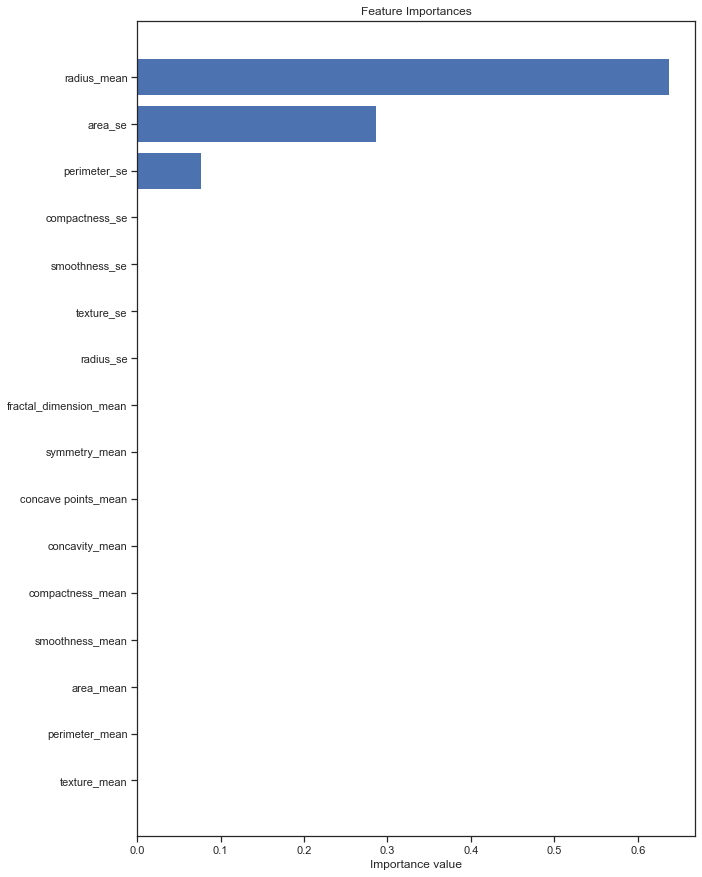

In [189]:
# plotting feature importances
features = df.drop('diagnosis_target', axis=1).columns

importances = dec_tree.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance value')
plt.show()

The important featurs for $C5.0$ decision tree build model are "concave points_mean", "perimeter_worst", "radius_worst" and, "texture_worst"

### Decision Tree using CART

In [190]:
# import the model
dec_tree_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0,
                                 max_leaf_nodes = 5)

# fit the model
dec_tree_cart.fit(X_train, y_train)

# make predictions
y_pred_dt_cart = dec_tree_cart.predict(X_test)
y_pred_dt_cart

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [191]:
# The predict method is used to predict the actual class while predict_proba method can be used to 
# infer the class probabilities
probs_dt_cart = dec_tree_cart.predict_proba(X_test)[:,1]

In [192]:
cm = metrics.confusion_matrix(y_test, y_pred_dt_cart)

In [193]:
conf_mat_dtcart = pd.crosstab(y_test, y_pred_dt_cart, rownames=['Actual'], \
                       colnames=['Predicted'], margins = True) 
conf_mat_dtcart

Predicted,0,1,All
Actual,,,
0,89,1,90
1,6,47,53
All,95,48,143


Text(0.5, 257.44, 'Predicted label')

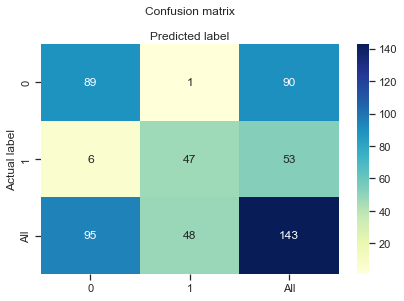

In [194]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_dtcart), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [195]:
dtcart_acc_train = accuracy_score(y_train, dec_tree_cart.predict(X_train))
print(f'The accuracy of the training dataset is: {dtcart_acc_train}')

dtcart_acc_test = accuracy_score(y_test, y_pred_dt_cart)
print(f'The accuracy of the test dataset is: {dtcart_acc_test}')

The accuracy of the training dataset is: 0.9413145539906104
The accuracy of the test dataset is: 0.951048951048951


In [196]:
print(classification_report(y_test, y_pred_dt_cart))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



#### Detecting important features/variables

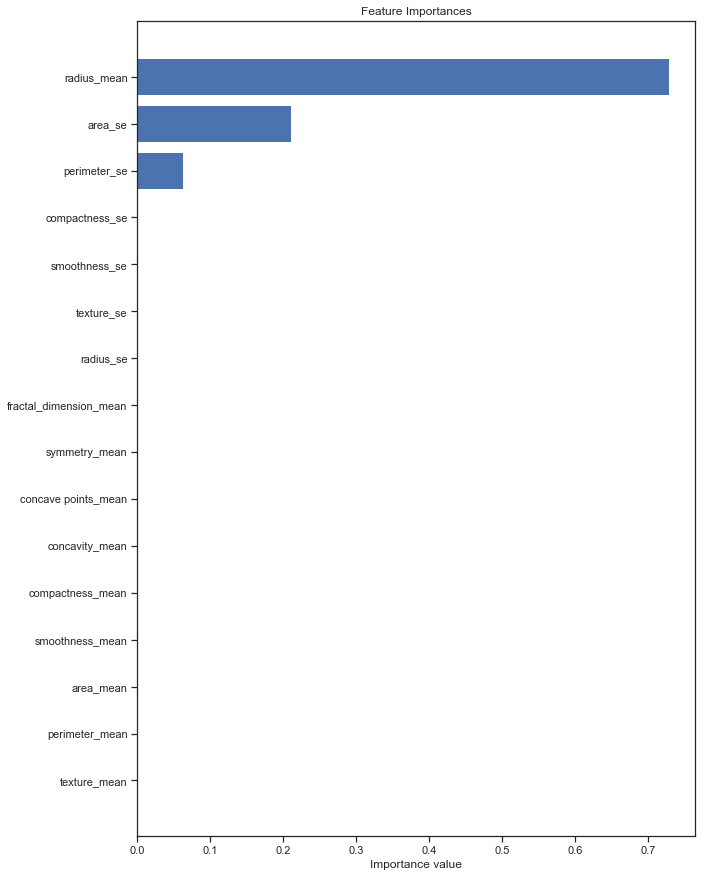

In [197]:
# plotting feature importances
features = df.drop('diagnosis_target', axis=1).columns

importances = dec_tree_cart.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance value')
plt.show()

### K-means algorithm

In [198]:
# Using Elbow method to find the best number of clusters for the model.

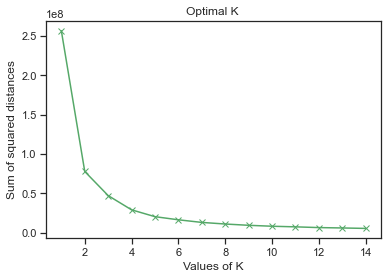

In [199]:
Sum_of_squared_distances = []

Krange = range(1,15)
for num_clusters in Krange :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)
        
plt.plot(Krange,Sum_of_squared_distances,'-gx')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Optimal K ')
plt.show()

The elbow figure shows that our data has 2 clusters. 

In [200]:
# import the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


# create a knn classifier
knn = KNeighborsClassifier(n_neighbors = 2)

# fit the model
knn.fit(X_train, y_train)

# make predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [201]:
# The predict method is used to predict the actual class while predict_proba method can be used to 
# infer the class probabilities
probs_knn = knn.predict_proba(X_test)[:,1]

In [202]:
cm = metrics.confusion_matrix(y_test, y_pred_knn)

In [203]:
conf_mat_knn = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], \
                       colnames=['Predicted'], margins = True) 
conf_mat_knn

Predicted,0,1,All
Actual,,,
0,87,3,90
1,10,43,53
All,97,46,143


Text(0.5, 257.44, 'Predicted label')

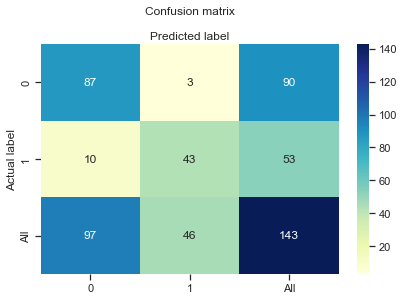

In [204]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_knn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [205]:
knn_acc_train = accuracy_score(y_train, knn.predict(X_train))
print(f'The accuracy of the training dataset is: {knn_acc_train}')

knn_acc_test = accuracy_score(y_test, y_pred_knn)
print(f'The accuracy of the test dataset is: {knn_acc_test}')

The accuracy of the training dataset is: 0.9765258215962441
The accuracy of the test dataset is: 0.9090909090909091


In [206]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        90
           1       0.93      0.81      0.87        53

    accuracy                           0.91       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.91      0.91       143



### Non-linear model

### Random Forest

In [207]:
# import the model
from sklearn.ensemble import RandomForestClassifier

# create a random forest classifier with 50 trees
random_forest = RandomForestClassifier(n_estimators=120, max_depth=3, random_state=0,
                                      n_jobs=-1)

# fit the model
random_forest.fit(X_train, y_train)

# make predictions
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [208]:
# The predict method is used to predict the actual class while predict_proba method can be used to 
# infer the class probabilities
probs_rf = random_forest.predict_proba(X_test)[:,1]

#### Evaluation model using confusion matrix


In [209]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)

In [210]:
conf_mat_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], \
                       colnames=['Predicted'], margins = True) 
conf_mat_rf

Predicted,0,1,All
Actual,,,
0,87,3,90
1,6,47,53
All,93,50,143


Text(0.5, 257.44, 'Predicted label')

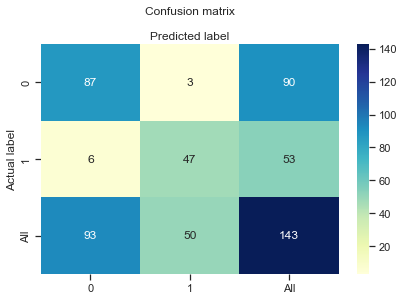

In [211]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(conf_mat_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [212]:
rf_acc_train = accuracy_score(y_train, random_forest.predict(X_train))
print(f'The accuracy of the training dataset is: {rf_acc_train}')

rf_acc_test = accuracy_score(y_test, y_pred_rf)
print(f'The accuracy of the test dataset is: {rf_acc_test}')

The accuracy of the training dataset is: 0.9694835680751174
The accuracy of the test dataset is: 0.9370629370629371


In [213]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        90
           1       0.94      0.89      0.91        53

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



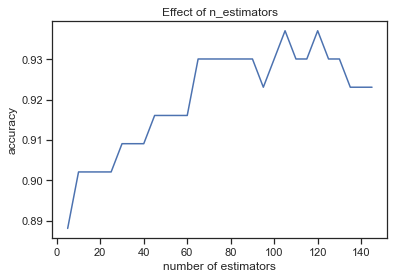

In [214]:
# Let's try different number of estimators (trees). 
# Number of estimator is the number of trees in the forest. 

estimators = np.arange(5, 150, 5)
accuracy_result = []

for n in estimators:
    random_forest.set_params(n_estimators=n)
    random_forest.fit(X_train, y_train)
    y_pred_rf=random_forest.predict(X_test)
    accuracy_result.append(metrics.accuracy_score(y_test, y_pred_rf))
plt.title("Effect of n_estimators")
plt.xlabel("number of estimators")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy_result);

As we can see from the figure, n_estimator = 120 has the highest accuracy with 0.94. We can change our n_estimator to 120 in order to get more accurate result.

#### Detecting important features/variables

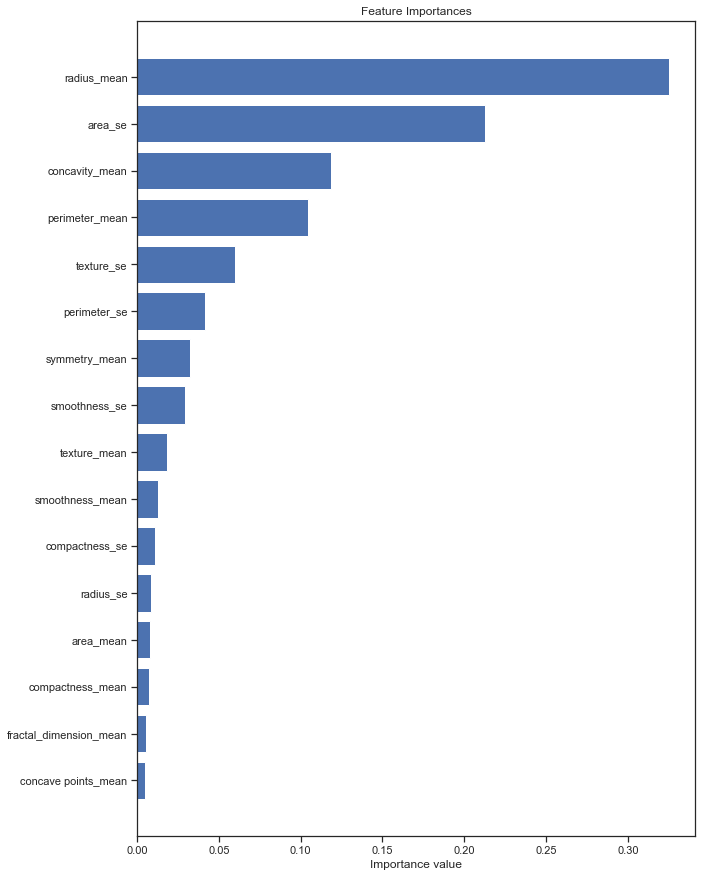

In [215]:
# plotting feature importances
features = df.drop('diagnosis_target', axis=1).columns

importances = random_forest.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance value')
plt.show()

The higher the value of the variable; the more significant feature for model.

In [216]:
# Comparing the models accuracy
from sklearn import model_selection

# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))

In [217]:
# evaluate each model in turn for train dataset
seed = 7
results_train = []
names_train = []
scoring = 'accuracy'
for name, model in models:
    
    kfold = model_selection.KFold(n_splits=10, 
                                  random_state=seed,
                                 shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results_train.append(cv_results)
    names_train.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.976523 (0.021051)
KNN: 0.938870 (0.019088)
CART: 0.899003 (0.024093)
Random Forest: 0.960078 (0.021127)


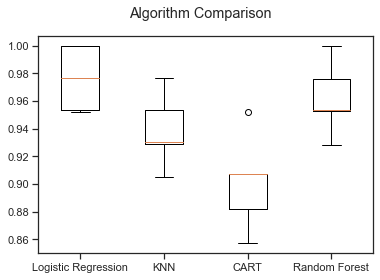

In [218]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_train)
ax.set_xticklabels(names_train)
plt.show()

From these results, we suggest that both logistic regression and KNN are perhaps the best models.

In [219]:
# evaluate each model in turn for test dataset
seed = 7
results_test = []
names_test = []
scoring = 'accuracy'
for name, model in models:
    
    kfold = model_selection.KFold(n_splits=10, 
                                  random_state=seed,
                                 shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results_test.append(cv_results)
    names_test.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.972381 (0.045115)
KNN: 0.930476 (0.060766)
CART: 0.936190 (0.067350)
Random Forest: 0.930000 (0.075714)


We compared the models together with the test and train dataset to check which model performed best according to accuracy. 

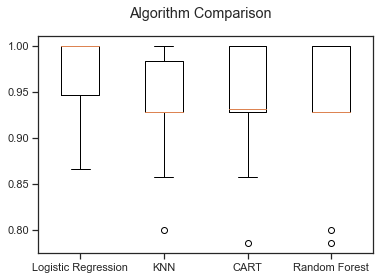

In [220]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_test)
ax.set_xticklabels(names_test)
plt.show()

From these results, we suggest that both logistic regression and random forest are perhaps the best models. 

In [232]:
# Comparing the accuracy of the models
models_comparision = pd.DataFrame({"Model": ["Logistic Regression", 
                                             "KNN", 
                                             "Decision Tree (C5.0)",
                                            "Decision Tree (CART)",
                                            "Random Forest"],
                                  "Score_train": [lg_acc_train,
                                           knn_acc_train,
                                           dtc5_acc_train,
                                           dtcart_acc_train,
                                           rf_acc_train],
                                  "Score_test": [lg_acc_test,
                                           knn_acc_test,
                                           dtc5_acc_test,
                                           dtcart_acc_test,
                                           rf_acc_test]})
models_comparision.sort_values(by = "Score_train",
                               ascending = False)

,Model,Score_train,Score_test
0,Logistic Regression,0.985915,0.944056
1,KNN,0.976526,0.909091
4,Random Forest,0.969484,0.937063
3,Decision Tree (CART),0.941315,0.951049
2,Decision Tree (C5.0),0.931925,0.944056


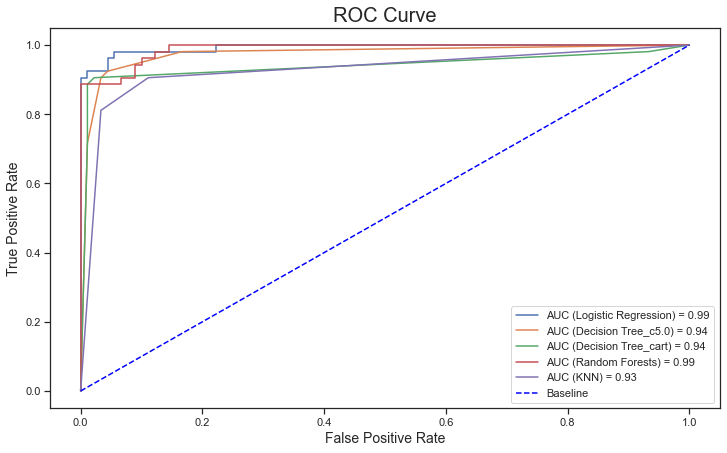

In [221]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'Good': 1, 'Bad': 0})

auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_dt_c5 = roc_auc_score(y_test_int, probs_dt_c5)
fpr_dt_c5, tpr_dt_c5, thresholds_dt_c5 = roc_curve(y_test_int, probs_dt_c5)

auc_dt_cart = roc_auc_score(y_test_int, probs_dt_cart)
fpr_dt_cart, tpr_dt_cart, thresholds_dt_cart = roc_curve(y_test_int, probs_dt_cart)

auc_rf = roc_auc_score(y_test_int, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, probs_rf)

auc_xg = roc_auc_score(y_test_int, probs_knn)
fpr_xg, tpr_xg, thresholds_knn = roc_curve(y_test_int, probs_knn)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt_c5, tpr_dt_c5, label=f'AUC (Decision Tree_c5.0) = {auc_dt:.2f}')
plt.plot(fpr_dt_cart, tpr_dt_cart, label=f'AUC (Decision Tree_cart) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (KNN) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();